<a href="https://colab.research.google.com/github/wambugudan/Data-Science-Projects/blob/main/Mall_Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing data from drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Reading the dataset
df =pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')

# Checking the number of Observations
num_observations, num_variables = df.shape

print(f'Number of Observations (Rows): {num_observations}')
print(f'Number of Variables (Columns): {num_variables}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of Observations (Rows): 200
Number of Variables (Columns): 5


# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_text

# Encoding categorical variable 'Genre'
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

# Select 'Age', 'Annual Income' and target variable ('Spending Score')
features = ['Age', 'Annual Income (k$)']
target = 'Spending Score (1-100)'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Training a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}\n')

# Displaying classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Displaying the decision tree rules
tree_rules = export_text(clf, feature_names=features)
print('\nDecision Tree Rules:')
print(tree_rules)


Model Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       2.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       2.0
          34       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

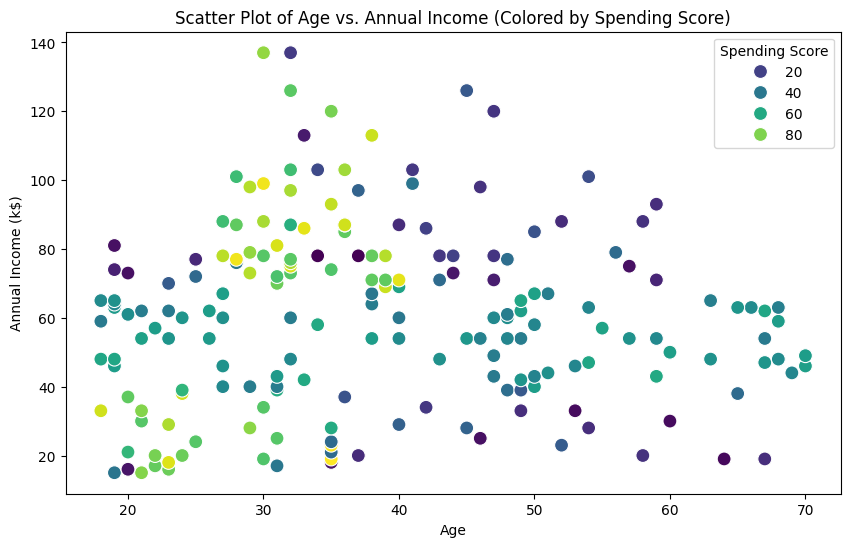

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


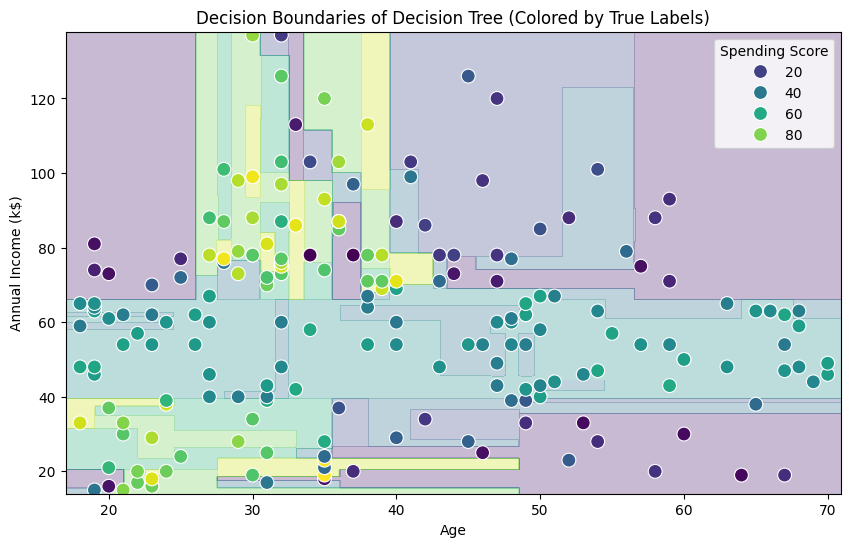

In [ ]:
# Visualizing the Classifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot of Age vs. Annual Income - Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Spending Score (1-100)', data=df, palette='viridis', edgecolor='w', s=100)
plt.title('Scatter Plot of Age vs. Annual Income (Colored by Spending Score)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Spending Score')
plt.show()

# Scatter plot with decision boundaries
plt.figure(figsize=(10, 6))

# Creating a meshgrid for plotting decision boundaries
x_min, x_max = df['Age'].min() - 1, df['Age'].max() + 1
y_min, y_max = df['Annual Income (k$)'].min() - 1, df['Annual Income (k$)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Decision boundaries
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot of Age vs. Annual Income
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Spending Score (1-100)', data=df, palette='viridis', edgecolor='w', s=100)
plt.title('Decision Boundaries of Decision Tree (Colored by True Labels)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Spending Score')
plt.show()


# K-Means Clustering

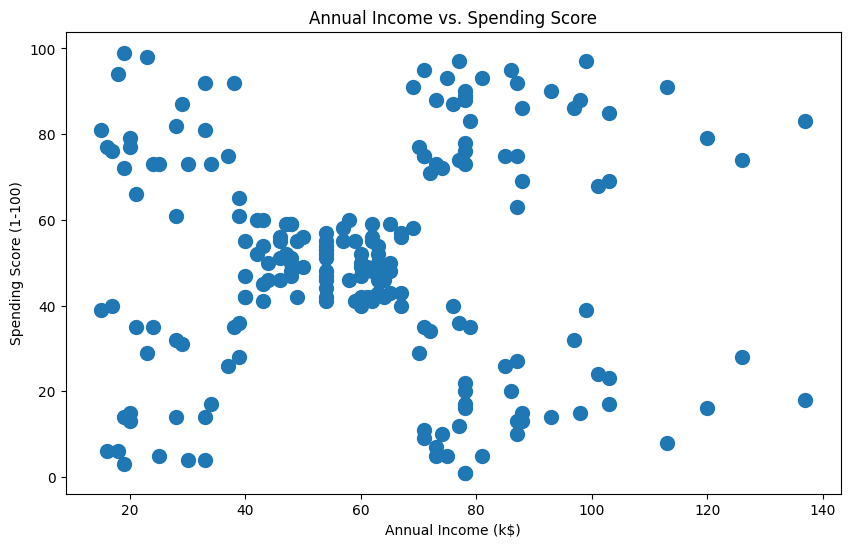

In [ ]:
# Plotting the data to visually inspect potential clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s=100)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

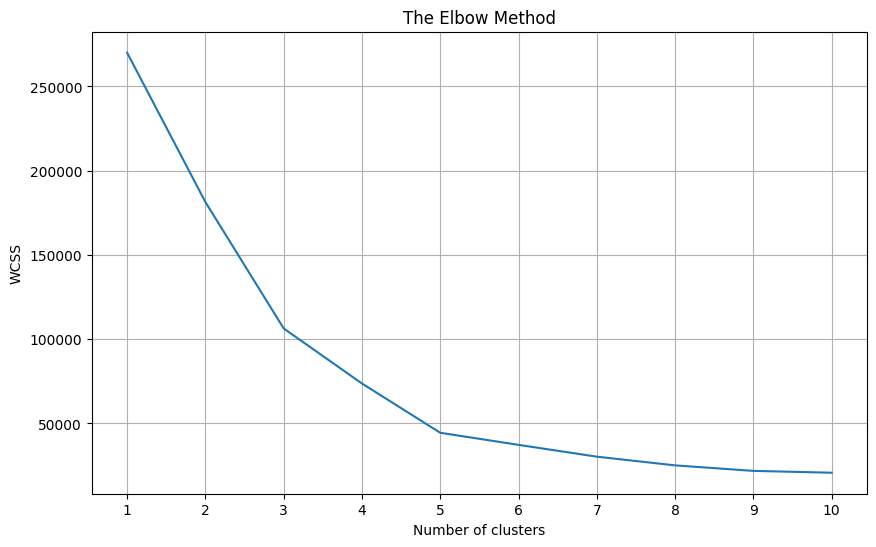

In [ ]:
# Using the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

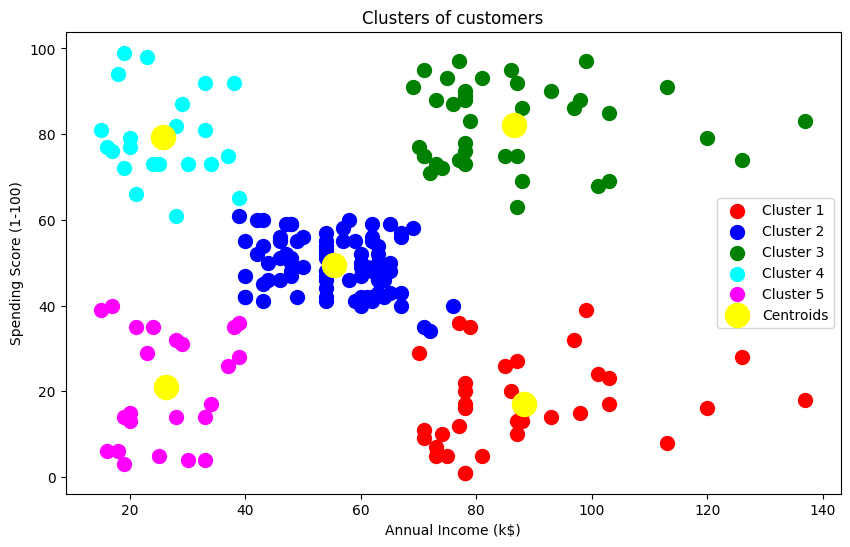

In [ ]:
# Applying K-means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(0, 5):
    plt.scatter(df.iloc[y_kmeans == i, 3], df.iloc[y_kmeans == i, 4], s = 100, c = colors[i], label = f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()